# Simple Feature Based Scheduler run with SOCS

This example notebook show how to do a simple 1 day FBS run using SOCS. In this example we use the default FBS configuration, a separate example will be given on how to provide a custom configuration. 

Before running the notebook make sure you run `manage_db --save-dir $HOME/run_local/output/` on the command line to setup the SOCS database. 

In [1]:
import logging
import healpy as hp

from lsst.sims.ocs.database import SocsDatabase
from lsst.sims.ocs.kernel import Simulator
from lsst.sims.featureScheduler.driver import FeatureSchedulerDriver as Driver
from lsst.sims.ocs.setup import create_parser
from lsst.sims.ocs.setup import apply_file_config, read_file_config
import time
t0 = time.time()

In [2]:
logging.getLogger().setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
                    datefmt='%m-%d %H:%M')

This next cell loads default command line arguments. These are needed mainly to setup the database.

In [3]:
parser = create_parser()
args = parser.parse_known_args()[0]
prog_conf = read_file_config()
if prog_conf is not None:
    apply_file_config(prog_conf, args)
print(args.sqlite_save_dir, args.session_id_start, args.sqlite_session_save_dir)

/home/opsim/run_local/output/ None None


Setup socs database to store simulations results, if needed. 

In [4]:
db = SocsDatabase(sqlite_save_path=args.sqlite_save_dir,
                  session_id_start=args.session_id_start,
                  sqlite_session_save_path=args.sqlite_session_save_dir)

In [5]:
session_id = db.new_session("FBS test on notebook")

We now define a driver for the simulation. In this case, we already imported the FBS driver as Driver so we simply call it. 

In [6]:
driver = Driver()

08-03 17:45 schedulerDriver INFO     buildFieldsTable: 5292 fields
/home/opsim/repos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:73: Warning: Cannot calculate effective wavelengths; either sims_photUtils is unavailable (setup sims_photUtils) or $LSST_THROUGHPUTS_DEFAULT is undefined (setup throughputs package). Without these, simply using default effective wavelengths from version 1.3.
  % (DEFAULT_WAVELENGTH_VERSION), Warning)


By default the duration of a simulation is 10 years. Here we will run a single day. 

In [7]:
args.frac_duration = 0.003

We now set the SOCS simulator

In [8]:
sim = Simulator(args, db, driver=driver)

In [9]:
sim.initialize()

08-03 17:45 kernel.Simulator INFO     Initializing simulation
08-03 17:45 kernel.Simulator INFO     Simulation Session Id = 2000
08-03 17:45 configuration.ConfigurationCommunicator INFO     Initializing configuration communication
/home/opsim/repos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:73: Warning: Cannot calculate effective wavelengths; either sims_photUtils is unavailable (setup sims_photUtils) or $LSST_THROUGHPUTS_DEFAULT is undefined (setup throughputs package). Without these, simply using default effective wavelengths from version 1.3.
  % (DEFAULT_WAVELENGTH_VERSION), Warning)
08-03 17:47 kernel.Simulator INFO     Finishing simulation initialization


And run the simulation

In [10]:
sim.run()

08-03 17:47 kernel.Simulator INFO     Starting simulation
08-03 17:47 kernel.Simulator INFO     run: rx scheduler config survey_duration=3650.0
08-03 17:47 kernel.Simulator INFO     run: rx driver config={'ranking': {'coadd_values': 1, 'time_balancing': 1, 'timecost_time_max': 150.0, 'timecost_time_ref': 5.0, 'timecost_cost_ref': 0.3, 'timecost_weight': 1.0, 'filtercost_weight': 1.0, 'propboost_weight': 1.0, 'lookahead_window_size': 0, 'lookahead_bonus_weight': 0.0}, 'constraints': {'night_boundary': -12.0, 'ignore_sky_brightness': 0, 'ignore_airmass': 0, 'ignore_clouds': 0, 'ignore_seeing': 0}, 'darktime': {'new_moon_phase_threshold': 20.0}}
08-03 17:47 kernel.Simulator INFO     run: rx site config={'obs_site': {'name': 'Cerro Pachon', 'latitude': -30.2444, 'longitude': -70.7494, 'height': 2650.0}}
08-03 17:47 kernel.Simulator INFO     run: rx telescope config={'telescope': {'altitude_minpos': 20.0, 'altitude_maxpos': 86.5, 'azimuth_minpos': -270.0, 'azimuth_maxpos': 270.0, 'altitude_

We now have access to all the scheduler data structure to play with. In the cell bellow, we plot the TargetMapBasis function for the `g` filter.

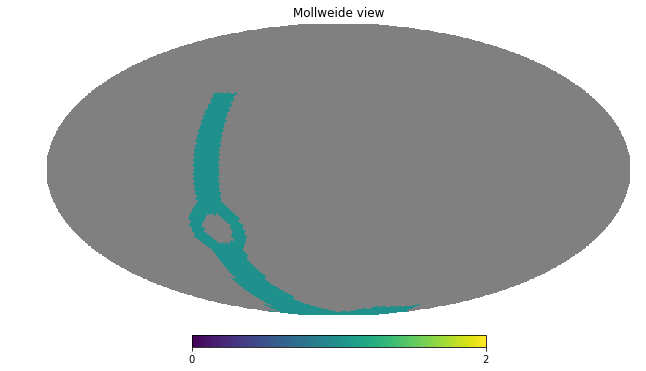

In [11]:
hp.mollview(sim.driver.scheduler.survey_lists[0][1].basis_functions[2]())

In [12]:
trun = time.time() - t0
print('ran in %i, %i minutes=%i hours' % (trun, trun/60., trun/3600.))


ran in 447, 7 minutes=0 hours
